In [10]:
%matplotlib inline
import pandas as pd
import numpy as np
import sqlite3 
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] =(12, 8)

conn = sqlite3.connect('weather.db')
fname = 'taxi.csv'


###### prep and munge taxi data

> extract the first 21 columns from the taxi data
> 


In [32]:
df = pd.read_csv(fname, usecols=np.arange(21), parse_dates=['lpep_pickup_datetime','Lpep_dropoff_datetime'])
df['Vendor'] = df['VendorID'].apply({1: 'Creative', 2: 'VeriFone'}.get).astype('category')

df.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,Vendor
0,2,2015-03-04 15:39:16,2015-03-04 15:42:30,N,1,-73.992241,40.690121,-73.999664,40.684994,2,...,0.0,0.5,0.00,0.0,NaN,0.3,5.30,2,1,VeriFone
1,2,2015-03-22 17:36:49,2015-03-22 17:45:39,N,5,-73.930038,40.819576,-73.907173,40.811306,2,...,0.0,0.0,0.00,0.0,NaN,0.0,12.00,2,2,VeriFone
2,2,2015-03-25 22:08:45,2015-03-25 22:53:29,N,1,-73.961082,40.807022,-73.984642,40.663147,1,...,0.5,0.5,9.26,0.0,NaN,0.3,55.56,1,1,VeriFone
3,2,2015-03-16 13:45:20,2015-03-16 13:52:04,N,1,-73.913200,40.777962,-73.926994,40.772743,2,...,0.0,0.5,0.00,0.0,NaN,0.3,7.30,2,1,VeriFone
4,2,2015-03-19 18:53:50,2015-03-19 18:59:04,N,1,-73.925888,40.827602,-73.916351,40.824966,1,...,1.0,0.5,0.00,0.0,NaN,0.3,7.30,2,1,VeriFone


> On the Weather Data

In [33]:
wdf = pd.read_sql('SELECT * FROM weather', conn)

wdf.columns

Index(['STATION', 'DATE', 'PRCP', 'SNOW', 'TMAX', 'TMIN'], dtype='object')

In [34]:
wdf = pd.read_sql('SELECT * FROM weather', conn,
                  parse_dates=['DATE'], index_col=['DATE'])

wdf.dtypes


STATION     object
PRCP       float64
SNOW       float64
TMAX         int64
TMIN         int64
dtype: object

In [35]:
wdf.index

DatetimeIndex(['2015-03-01', '2015-03-02', '2015-03-03', '2015-03-04',
               '2015-03-05', '2015-03-06', '2015-03-07', '2015-03-08',
               '2015-03-09', '2015-03-10',
               ...
               '2016-03-23', '2016-03-24', '2016-03-25', '2016-03-26',
               '2016-03-27', '2016-03-28', '2016-03-29', '2016-03-30',
               '2016-03-31', '2016-04-01'],
              dtype='datetime64[ns]', name='DATE', length=398, freq=None)

In [36]:
wdf.describe()

,PRCP,SNOW,TMAX,TMIN
count,398.000000,398.000000,398.000000,398.000000
mean,0.109799,0.129146,65.017588,50.035176
std,0.310245,1.463461,17.556593,16.336782
min,0.000000,0.000000,15.000000,-1.000000
25%,0.000000,0.000000,52.000000,38.000000
50%,0.000000,0.000000,65.000000,50.000000
75%,0.020000,0.000000,81.750000,65.000000
max,2.310000,27.300000,97.000000,82.000000


> Convert temperature C to F

In [37]:
from scipy.constants import convert_temperature

wdf['tempF'] = convert_temperature(wdf['TMAX']/10, 'C', 'F')

wdf.head()

,STATION,PRCP,SNOW,TMAX,TMIN,tempF
DATE,,,,,,
2015-03-01,GHCND:USW00094728,0.52,4.8,31,24,37.58
2015-03-02,GHCND:USW00094728,0.00,0.0,39,27,39.02
2015-03-03,GHCND:USW00094728,0.67,1.8,37,22,38.66
2015-03-04,GHCND:USW00094728,0.25,0.0,45,35,40.10
2015-03-05,GHCND:USW00094728,0.76,7.5,40,19,39.20


> ###### Join the taxi and weather dataframes

In [38]:
ddf = df.groupby(df['lpep_pickup_datetime'].dt.date).count()

ddf.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,Vendor
lpep_pickup_datetime,,,,,,,,,,,,,,,,,,,,,
2015-03-01,3177,3177,3177,3177,3177,3177,3177,3177,3177,3177,...,3177,3177,3177,3177,0,3177,3177,3177,3177,3177
2015-03-02,2775,2775,2775,2775,2775,2775,2775,2775,2775,2775,...,2775,2775,2775,2775,0,2775,2775,2775,2775,2775
2015-03-03,2990,2990,2990,2990,2990,2990,2990,2990,2990,2990,...,2990,2990,2990,2990,0,2990,2990,2990,2990,2990
2015-03-04,3072,3072,3072,3072,3072,3072,3072,3072,3072,3072,...,3072,3072,3072,3072,0,3072,3072,3072,3072,3072
2015-03-05,2491,2491,2491,2491,2491,2491,2491,2491,2491,2491,...,2491,2491,2491,2491,0,2491,2491,2491,2491,2491


In [39]:
jdf = ddf.join(wdf)

jdf.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Total_amount,Payment_type,Trip_type,Vendor,STATION,PRCP,SNOW,TMAX,TMIN,tempF
lpep_pickup_datetime,,,,,,,,,,,,,,,,,,,,,
2015-03-01,3177,3177,3177,3177,3177,3177,3177,3177,3177,3177,...,3177,3177,3177,3177,GHCND:USW00094728,0.52,4.8,31,24,37.58
2015-03-02,2775,2775,2775,2775,2775,2775,2775,2775,2775,2775,...,2775,2775,2775,2775,GHCND:USW00094728,0.00,0.0,39,27,39.02
2015-03-03,2990,2990,2990,2990,2990,2990,2990,2990,2990,2990,...,2990,2990,2990,2990,GHCND:USW00094728,0.67,1.8,37,22,38.66
2015-03-04,3072,3072,3072,3072,3072,3072,3072,3072,3072,3072,...,3072,3072,3072,3072,GHCND:USW00094728,0.25,0.0,45,35,40.10
2015-03-05,2491,2491,2491,2491,2491,2491,2491,2491,2491,2491,...,2491,2491,2491,2491,GHCND:USW00094728,0.76,7.5,40,19,39.20


> ###### Plot chart for a Month's Data

> check if there is any co-relation between temperature 
> and no. of rides

Text(0,0.5,'Daily Rides')

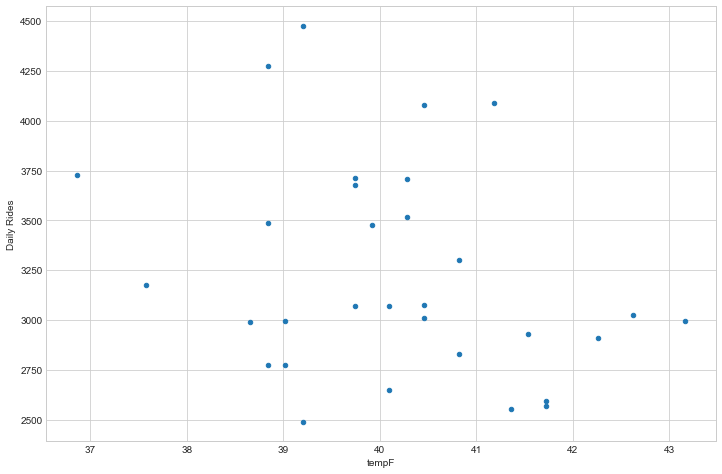

In [41]:
ax = jdf.plot.scatter(x='tempF', y='Vendor')
ax.set_ylabel('Daily Rides')
